# Transmon coupled to CPW resonator

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

### Create the design in Metal
Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '4mm'
design.chips.main.size['size_y'] = '6mm'

gui = MetalGUI(design)

Create one meander resonator connected to a transmons and open-to-ground qcomponents.

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.interconnects.meandered import RouteMeander
from qiskit_metal.qlibrary.connectors.open_to_ground import OpenToGround

In [4]:
#Explore the options of the OpenToGround.
OpenToGround.get_template_options(design)

{'width': '10um',
 'gap': '6um',
 'termination_gap': '6um',
 'pos_x': '0um',
 'pos_y': '0um',
 'orientation': '0',
 'chip': 'main',
 'layer': '1'}

In [5]:
#Explore the options of the TransmonPocket.
TransmonPocket.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [6]:
#Explore the options of the RouteMeander.
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true'}

In [7]:
#Setup the TransmonPocket loacation and add a connection_pad.
q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

In [8]:
#Setup the OpenToGround location and orientation.
otg_options = dict(pos_x='2.5mm',  pos_y='0.5mm', orientation='0')

otg = OpenToGround(design, 'open_to_ground', options=otg_options)

In [9]:
coupler_options = Dict(
                        pin_inputs=Dict(
                                start_pin=Dict(component=q1.name, pin='readout'),
                        end_pin=Dict(
                                component=otg.name, pin='open')), 
                        fillet='99.9um',
                        total_length = '5mm',
                        lead = Dict(start_straight = '200um'
                                    ))


bus = RouteMeander(design, 'coupler', options= coupler_options)

gui.rebuild()
gui.autoscale()

In [10]:
# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

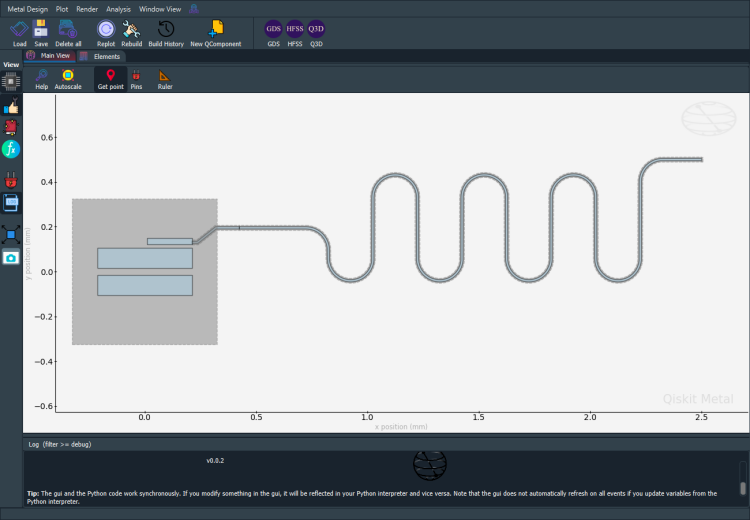

In [11]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [12]:
# Closing the Qiskit Metal GUI
gui.main_window.close()

True